<a href="https://colab.research.google.com/github/gwittich/Heart-Patient-Prognosis/blob/main/02_Heart_Patient__DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Patient Prognosis**

Data Scientist:   __Gail Wittich__\
Email:      gwittich@optusnet.com.au \
Website:    www.linkedin.com/in/gail-wittich \
Copyright:  Copyright 2020, Gail Wittich 

# Data Exploration (EDA) 

### **Load Packages**

In [1]:
from google.colab import drive                         # for accessing files
import matplotlib.pyplot as plt                        # for data visualisation
import numpy as np                                     # for numeric computations
import pandas as pd                                    # for data analysis
import pickle                                          # for file reading and saving
import seaborn as sns                                  # for data visualisation

import warnings                                        # to ignore warnings
warnings.filterwarnings('ignore')

### **Load Data**

In [2]:
# mount the google drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Unpickle Training data
EDA_train_df = pd.read_pickle('/content/drive/My Drive/Heart_Patient/Data/train_data_4_EDA.pkl')

# Unpickle Test data
EDA_new_test_df = pd.read_pickle('/content/drive/My Drive/Heart_Patient/Data/test_data_4_EDA.pkl')

## EDA
Primary screening
1. Look at the data: feature names, kind of values they contain
2. Look at an overview of the features: number, types, Null counts

In [4]:
EDA_train_df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,DX6,20,26.179725,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,DX6,8,22.638945,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,DX1,53,21.326131,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [5]:
# Summary of the data
EDA_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23097 entries, 0 to 23096
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23089 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   A                          21830 non-null  float64
 9   B                          21830 non-null  float64
 10  C                          21830 non-null  float64
 11  D                          21830 non-null  float64
 12  E                          21830 non-null  float64
 13  F                          21830 non-null  flo

**Observations:**

1. There are 23097 records
2. The data set has 16 features plus the Target.
3. There are some missing values in the folowing features (non-null < 23097):
    - Treated_with_drugs
    - A
    - B
    - C
    - D
    - E
    - F
    - Z
    - Number_of_prev_cond
    
4. There is a mix of feature data types: float64(9), int64(5), object(3)

Visualise the distribution of the target variable, 'Survived_1_year', to determine if the dataset is balanced.

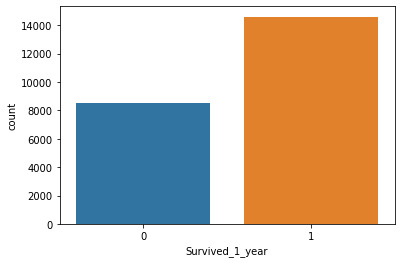

In [6]:
sns.countplot(x='Survived_1_year', data=EDA_train_df)
plt.show()

There are 8000 + patients who did not survive for 1 year after treatment and more than 14000 patients who survived for at least 1 year after treatment. The ratio is approx 1:2. This is not a great enough imbalance (skew) to require attention.

**Perform EDA on Numeric (continuous) variables**

In [7]:
# Show only the numerical features
print(EDA_train_df.select_dtypes(include=np.number).columns)

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year'],
      dtype='object')


**Numeric (Continuous) variables**\
**Not all Numeric features are actually statistically significant Continuous Variables.** ie 
* ID_Patient_Care_Situation' is record identification data, they will be ignored for data analysis. 
* 'Patient_ID' is record identification data, they will be ignored for data analysis.
* 'Diagnosed_Condition' uses a number to represent conditions, making it a Categorical feature.
* A, B, C, D, E, F, Z are Categorical features. (addressed later)  A count of their values results in the feature 'Number_of_prev_cond'.
* 'Survived_1_year' uses a number to represent yes or no.


This leaves the following 3 Numeric Features:
*   'Patient_Age', 
*   'Patient_Body_Mass_Index', 
*   'Number_of_prev_cond', 

In [8]:
# Create a List of just the numeric features
numeric_cols_df = EDA_train_df[['Patient_Age', 'Patient_Body_Mass_Index', 
                                'Number_of_prev_cond']]
numeric_cols_df.head(10)

,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond
0,60,21.655523,2.0
1,2,28.852743,3.0
2,20,26.179725,2.0
3,8,22.638945,2.0
4,53,21.326131,1.0
5,20,23.438528,2.0
6,5,23.882432,2.0
7,45,17.059734,1.0
8,43,22.182933,2.0
9,60,17.956259,3.0


In [9]:
# Show the number of unique values in each feature
numeric_cols_df.nunique()   # return the number of unique values in each feature

Patient_Age                   74
Patient_Body_Mass_Index    10599
Number_of_prev_cond            5
dtype: int64

The number of unique values for each of the numeric features appears reasonable given they are continuous variables. Each is with the range of possble for that feature.

In [10]:
# **Check for null values in numerical features**
numeric_cols_df.isnull().sum()

Patient_Age                   0
Patient_Body_Mass_Index       0
Number_of_prev_cond        1267
dtype: int64

'Number_of_prev_cond' has 1356 (5.87% of records) missing values.

Expected values in 'Number_of_prev_cond' is a discrete value integer ranging from 0 to 7.

'Number_of_prev_cond' is dependent on the values in the seven features - 'A', 'B', 'C', 'D', 'E', 'F', 'Z' (i.e. what specifically the previous conditions were).
One option is to fill the missing values with, for example, the Mode of the feature. Patients that DID NOT have any previous conditions would not have null values in the seven features - 'A', 'B', 'C', 'D', 'E', 'F', 'Z', meaning that the value of 'Number_of_prev_cond' would also not be Null, it would be '0'. Another option is to fill it with '0', to represent Unknown (prefered option in this situation).


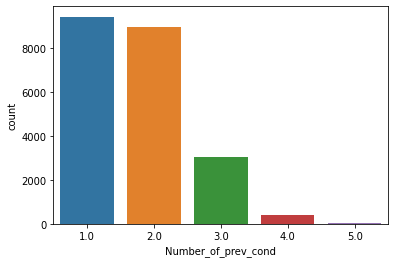

In [11]:
sns.countplot(x='Number_of_prev_cond', data=EDA_train_df)
plt.show()

In [12]:
# filling the missing value of 'Number_of_prev_cond' with '0'
EDA_train_df['Number_of_prev_cond'] = EDA_train_df['Number_of_prev_cond'].fillna(0)

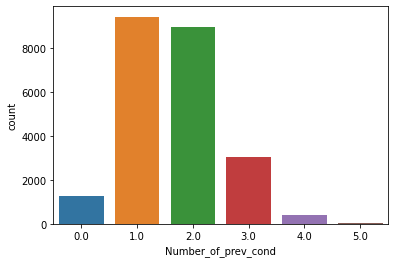

In [13]:
sns.countplot(x='Number_of_prev_cond', data=EDA_train_df)
plt.show()

In [14]:
# Show the basic statistical description of the numerical features
numeric_cols_df.describe()

,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond
count,23097.000000,23097.000000,21830.000000
mean,33.235831,23.439701,1.749427
std,19.513294,3.783907,0.771039
min,0.000000,1.089300,1.000000
25%,16.000000,20.201721,1.000000
50%,33.000000,23.373801,2.000000
75%,50.000000,26.734052,2.000000
max,142.000000,29.999579,5.000000


**Observation**

1. This shows that the minimum and maximum values for numerical features are not all within expected ranges.

**Box Plot**

A Box Plot shows the data by feature, displaying:
- The five-number summary of a set of the data, ie:
  *  minimum
  *  first quartile (Q1)
  *  median
  *  third quartile (Q3)
  *  maximum
- Value of first quartile
- Value of third quartile
- Median
- outliers
- outlier values
- symmetry of data
- how tightly data is grouped (distributed)
- if and how the data is skewed.

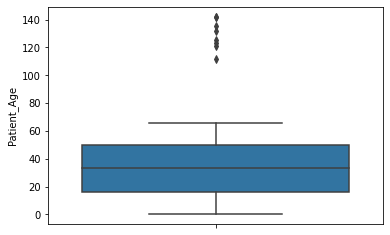

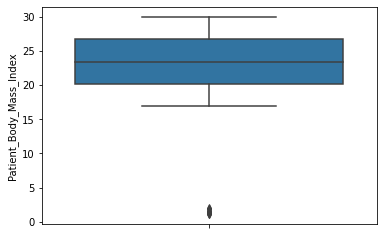

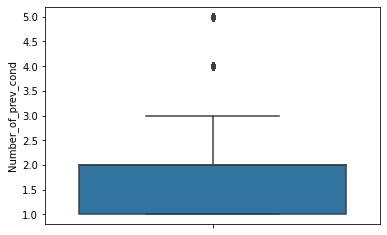

In [15]:
# for feature in numeric_cols_df.drop('Survived_1_year', axis = 1).columns:
#   sns.boxplot(x='Survived_1_year', y=feature, data=numeric_cols_df)
#   plt.show()

for feature in numeric_cols_df.columns:
  sns.boxplot(y=feature, data=numeric_cols_df)
  plt.show()

There are some outliers in the features:
 - 'Patient_Age'
 - 'Patient_Body_Mass_Index'
 - 'Number_of_prev_cond' - This is not of any concern - it is valuable data.

####'Patient_Age' Outliers
The 8 Outliers for 'Patient_Age' are in excess of 110. This is unlikely since the oldest person ever to have lived in Greenland died before turning 103yo. The outliers were replaced with the mean.

In [16]:
EDA_train_df[(EDA_train_df.Patient_Age > 90)]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
1239,33007,0,12508,NaN,135,1.4606,UNKNOWN,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2137,33008,0,12509,NaN,112,1.2925,UNKNOWN,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
3346,33010,0,12511,NaN,142,1.5701,UNKNOWN,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
6257,33011,0,12512,NaN,132,1.9896,UNKNOWN,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
12863,33009,0,12510,NaN,142,1.1450,UNKNOWN,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
13192,33013,0,12514,NaN,121,1.0893,UNKNOWN,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
14574,33003,0,12504,NaN,125,1.8282,UNKNOWN,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
19669,33004,0,12505,NaN,123,1.9290,UNKNOWN,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [17]:
# replace 'Patient_Age' with mean, if 'Patient_Age' > 90
EDA_train_df.Patient_Age = np.where(EDA_train_df.Patient_Age > 90, EDA_train_df.Patient_Age.mean(), EDA_train_df.Patient_Age)

In [18]:
# check that there are no longer any 'Patient_Age' > 90
EDA_train_df[(EDA_train_df.Patient_Age > 90)]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year


In [19]:
# check the 'new' Patient_Age' of the first outlier, by index 
EDA_train_df.iloc[[1239]]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
1239,33007,0,12508,NaN,33.235831,1.4606,UNKNOWN,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


#### 'Patient_Body_Mass_Index' Outliers
The outliers for 'Patient_Body_Mass_Index' are closer to zero than the bulk of the data. 
**BMI = (Weight in kilograms) divided by (Height in metres squared)**

A normal BMI is one that falls between **18.5 and 24.9**. This indicates that a person is within the normal weight range for his or her height.

  Body Mass Index  (BMI)  | Weight Status
  -------------  | -------------
  Below 18.5 | Underweight
  18.5 - 24.9 |	Normal
  25.0 - 29.9	| Overweight
  30.0 plus	| Obese

Given the data above, the outliers for 'Patient_Body_Mass_Index' are acceptable data.

Heat map of the correlation analysis between the continuous varibles.

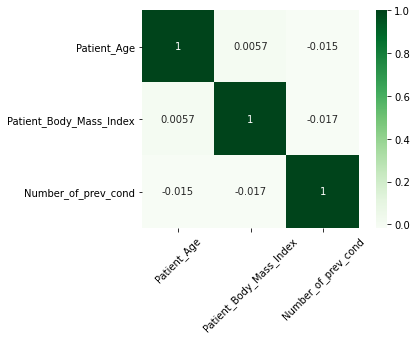

In [20]:
colormap = sns.diverging_palette(500, 500, as_cmap = True)
sns.heatmap(EDA_train_df[['Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond']].corr(),
            cmap = 'Greens',
            square = True,
            annot = True)
plt.xticks(rotation=45)
plt.show()

There is very little correlation between Numeric variables.

Check for missing Values

In [21]:
EDA_train_df.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              8
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
A                            1267
B                            1267
C                            1267
D                            1267
E                            1267
F                            1267
Z                            1267
Number_of_prev_cond             0
Survived_1_year                 0
dtype: int64

The following features have missing values: 
- 'Treated_with_drugs' - There are only 8 missing vlaues. It is possible that 8 patients were not treated with any drugs. These values will be replaced with '0'.

- A
- B
- C 
- D 
- E 
- F 
- Z 
- 'Number_of_prev_cond'
'Number_of_prev_cond' had 1356 missing values (exactly the same number of missing vales in each of features 'A', 'B', 'C', 'D', 'E', 'F', 'Z' - the specific condition features). Since 'Number_of_prev_cond' null values were replaced with '0' it follows that features 'A', 'B', 'C', 'D', 'E', 'F', 'Z' would also have null values replaced with '0'.


In [22]:
# filling the missing value of features 'A', 'B', 'C', 'D', 'E', 'F', 'Z'  with '0'
EDA_train_df[['Treated_with_drugs', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond']] = EDA_train_df[['Treated_with_drugs', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond']].fillna(value = 0)

In [23]:
EDA_train_df.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

### EDA on Categorical Data
In 'categorical_data', keep all the categorical features and remove the rest.

Features are not being removed from the main dataset, 'data'.

In [24]:
# Create a list of only the categorical features
categorical_cols = EDA_train_df.drop(numeric_cols_df.columns, axis=1)
categorical_cols.drop(['Patient_ID', 'ID_Patient_Care_Situation'], axis=1, inplace = True)

categorical_cols.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Survived_1_year
0,47,DX2,NO,URBAN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,3,DX6,NO,RURAL,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,7,DX6,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,31,DX6,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,43,DX1,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [25]:
# Show the number of unique values for each feature
categorical_cols.nunique()

Diagnosed_Condition    53
Treated_with_drugs     33
Patient_Smoker          3
Patient_Rural_Urban     2
A                       2
B                       2
C                       2
D                       2
E                       2
F                       2
Z                       2
Survived_1_year         2
dtype: int64

- 'Treated_with_drugs' feature has 33 unique values. - this is as expected since each combination of drugs is a seperate value.
- 'Patient_Smoker' has only 3 unique values. - this is as required

Plot the distribution of categorical variables.

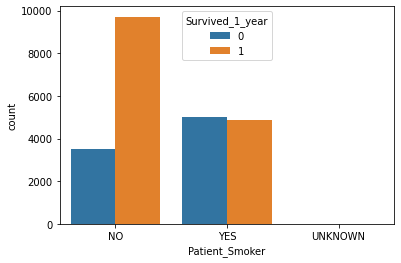

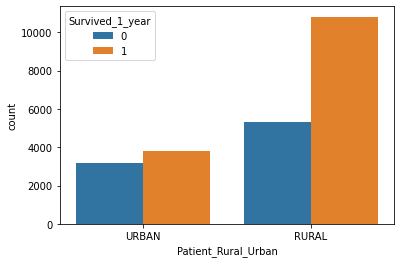

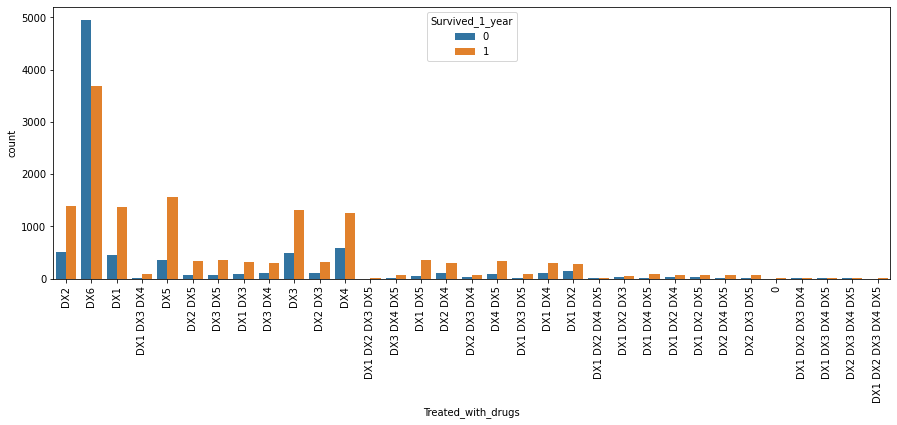

In [26]:
# Visualization of categorical Variables
for feature in ['Patient_Smoker', 'Patient_Rural_Urban']:
  sns.countplot(x=feature,  hue='Survived_1_year', data=EDA_train_df)
  plt.show()

plt.figure(figsize=(15,5))
sns.countplot(x='Treated_with_drugs',  hue='Survived_1_year', data=EDA_train_df)
plt.xticks(rotation=90)
plt.show()

Final data check before saving

In [27]:
EDA_train_df.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [28]:
EDA_train_df.nunique() 

ID_Patient_Care_Situation    23097
Diagnosed_Condition             53
Patient_ID                   10599
Treated_with_drugs              33
Patient_Age                     68
Patient_Body_Mass_Index      10599
Patient_Smoker                   3
Patient_Rural_Urban              2
A                                2
B                                2
C                                2
D                                2
E                                2
F                                2
Z                                2
Number_of_prev_cond              6
Survived_1_year                  2
dtype: int64

Compare above summary of Training data to Test Data

In [29]:
EDA_new_test_df.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [30]:
EDA_new_test_df.nunique()

ID_Patient_Care_Situation    9330
Diagnosed_Condition            52
Patient_ID                   6486
Treated_with_drugs             32
Patient_Age                    67
Patient_Body_Mass_Index      6486
Patient_Smoker                  2
Patient_Rural_Urban             2
A                               2
B                               2
C                               2
D                               2
E                               2
F                               2
Z                               1
Number_of_prev_cond             5
dtype: int64

### **Save Data**

In [31]:
# pickle Training data
EDA_train_df.to_pickle('/content/drive/My Drive/Heart_Patient/Data/train_data_4_PP.pkl')

# pickle Testing data
EDA_new_test_df.to_pickle('/content/drive/My Drive/Heart_Patient/Data/new_test_data_4_PP.pkl')